In [187]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline

In [117]:
loan = pd.read_csv(os.getcwd() + '\\data\\train_loanpred.csv')
tree_loan_cols = ['Gender', 'Married', 'Education',
                  'Self_Employed','ApplicantIncome', 'LoanAmount','Property_Area', 'Loan_Status']
tree_loan = loan[tree_loan_cols]
tree_loan.head(5)

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,NaN,Urban,Y
1,Male,Yes,Graduate,No,4583,128.0,Rural,N
2,Male,Yes,Graduate,Yes,3000,66.0,Urban,Y
3,Male,Yes,Not Graduate,No,2583,120.0,Urban,Y
4,Male,No,Graduate,No,6000,141.0,Urban,Y


In [118]:
tree_loan.isna().sum().sort_values(ascending=False)

Self_Employed      32
LoanAmount         22
Gender             13
Married             3
Loan_Status         0
Property_Area       0
ApplicantIncome     0
Education           0
dtype: int64

In [120]:
#print rows with Nan
tree_loan[tree_loan.isnull().any(axis=1)]

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
0,Male,No,Graduate,No,5849,NaN,Urban,Y
11,Male,Yes,Graduate,NaN,2500,109.0,Urban,Y
19,Male,Yes,Graduate,NaN,2600,115.0,Urban,Y
23,NaN,Yes,Not Graduate,No,3365,112.0,Rural,N
24,Male,Yes,Graduate,NaN,3717,151.0,Semiurban,N
...,...,...,...,...,...,...,...,...
588,NaN,No,Graduate,No,4750,94.0,Semiurban,Y
592,NaN,No,Graduate,Yes,9357,292.0,Semiurban,Y
600,Female,No,Graduate,NaN,416,350.0,Urban,N
601,Male,Yes,Not Graduate,NaN,2894,155.0,Rural,Y


In [121]:
idx_null = tree_loan[tree_loan["Self_Employed"].isnull()].index
dic = {"Graduate":"No", "Not Graduate": "Yes" }
tree_loan.loc[idx_null, 'Self_Employed'] = tree_loan.loc[idx_null, 'Education'].map(dic)

c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [122]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(np.array(tree_loan.loc[:, 'LoanAmount']).reshape(-1,1))
tree_loan['LoanAmount'] = imputer.transform(np.array(tree_loan.loc[:, 'LoanAmount']).reshape(-1,1))

c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [125]:
tree_loan.dropna(how="any", axis=0, inplace=True)
tree_loan.isna().sum().sort_values(ascending=False)

c:\users\edwinvivekn\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Loan_Status        0
Property_Area      0
LoanAmount         0
ApplicantIncome    0
Self_Employed      0
Education          0
Married            0
Gender             0
dtype: int64

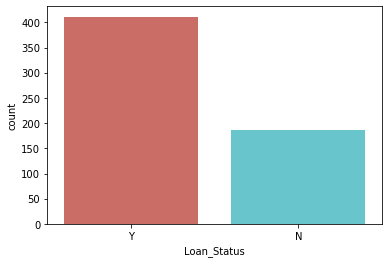

In [134]:
    target = tree_loan["Loan_Status"].value_counts()
    sns.countplot(tree_loan["Loan_Status"], palette='hls')

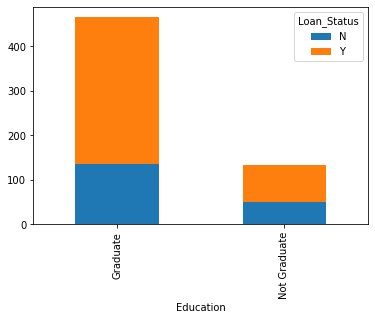

In [155]:
pd.crosstab(tree_loan.Education, tree_loan.Loan_Status).plot(kind="bar", stacked=True)

In [154]:
tree_loan.groupby(by='Loan_Status').count()

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area
Loan_Status,,,,,,,
N,187,187,187,187,187,187,187
Y,411,411,411,411,411,411,411


In [200]:
#encode = LabelEncoder()
#tree_loan.loc[:, 'Property_Area'] = encode.fit_transform(tree_loan['Property_Area']) #single col
tree_loan_encode = tree_loan.apply(LabelEncoder().fit_transform)  #multiple cols
tree_loan_encode.head() 

,Gender,Married,Education,Self_Employed,ApplicantIncome,LoanAmount,Property_Area,Loan_Status
0,1,0,0,0,368,100,2,1
1,1,1,0,0,299,81,0,0
2,1,1,0,1,136,26,2,1
3,1,1,1,0,88,73,2,1
4,1,0,0,0,373,94,2,1


In [201]:
X = tree_loan_encode.loc[:, tree_loan.columns != "Loan_Status"]
Y = tree_loan_encode.loc[:, tree_loan.columns == "Loan_Status"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Train: (%.0f, %.0f)" % x_train.shape)
print("Test: (%.0f, %.0f)" %x_test.shape)

Train: (478, 7)
Test: (120, 7)


In [213]:
reg = LogisticRegression(solver='lbfgs', multi_class='auto')
reg.fit(x_train, np.ravel(y_train))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [269]:
coeff = pd.DataFrame(x_train.columns)
coeff["Intercept"] = np.repeat(reg.intercept_, coeff.shape[0])
coeff["Coefficients"] = pd.Series(reg.coef_.ravel())
coeff['Odds Ratio'] = pd.Series(np.exp(reg.coef_.ravel()))
print("Score:", reg.score(x_train, y_train))


Score: 0.6757322175732218


In [270]:
#Recursive Feature Elimination
from sklearn.feature_selection import RFE
data_final_vars=x_train.columns.values.tolist()
#rfe_df = pd.DataFrame(data_final_vars)
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train.values.ravel())
coeff["Support"] = pd.Series(rfe.support_)
coeff["Ranking"] =  pd.Series(rfe.ranking_)
coeff

,0,Intercept,Coefficients,Odds Ratio,Support,Ranking
0,Gender,0.929537,0.253785,1.288895,True,1
1,Married,0.929537,0.478134,1.613062,True,1
2,Education,0.929537,-0.647953,0.523115,True,1
3,Self_Employed,0.929537,-0.090544,0.913434,True,1
4,ApplicantIncome,0.929537,0.000253,1.000253,False,3
5,LoanAmount,0.929537,-0.006846,0.993177,False,2
6,Property_Area,0.929537,0.032830,1.033374,True,1


In [271]:
y_pred = reg.predict(x_test)
pred_proba = reg.predict_proba(x_test)
pred_df = pd.DataFrame(pred_proba)
pred_df["Predictions"] = y_pred
pred_df

,0,1,Predictions
0,0.520554,0.479446,0
1,0.409914,0.590086,1
2,0.203287,0.796713,1
3,0.292022,0.707978,1
4,0.159108,0.840892,1
...,...,...,...
115,0.202628,0.797372,1
116,0.292992,0.707008,1
117,0.334164,0.665836,1
118,0.192410,0.807590,1


In [273]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[ 1 33]
 [ 6 80]]
              precision    recall  f1-score   support

           0       0.14      0.03      0.05        34
           1       0.71      0.93      0.80        86

    accuracy                           0.68       120
   macro avg       0.43      0.48      0.43       120
weighted avg       0.55      0.68      0.59       120



In [346]:
#The expit function, also known as the logistic sigmoid function, is defined as expit(x) = 1/(1+exp(-x)). It is the inverse of the logit function.
from scipy.special import expit
loss = expit(np.dot(x_test, reg.coef_.ravel()) + reg.intercept_)
#plt.plot(x_test, loss , color='red', linewidth=3)

In [383]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.615586
         Iterations 5
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.018   
Dependent Variable: Loan_Status      AIC:              602.5005
Date:               2020-05-25 23:13 BIC:              631.6878
No. Observations:   478              Log-Likelihood:   -294.25 
Df Model:           6                LL-Null:          -299.67 
Df Residuals:       471              LLR p-value:      0.093223
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     5.0000                                     
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
Gender           0.5010   0.2417  2.0729 0.0382  0.0273  0.9748
Married          0.5833   0.2223  2.6242 0.0087  0.1477  1.0190
Education       -0.4814   0

0.5085499316005472


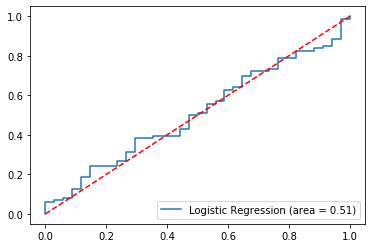

In [387]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test,  pred_proba[:,1])
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc="lower right")

Logistic: f1=0.804 auc=0.746


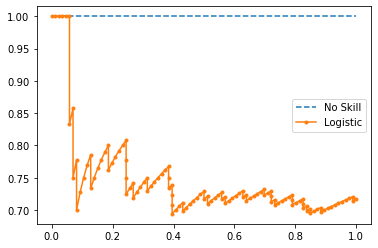

In [394]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
lr_precision, lr_recall, _ = precision_recall_curve(y_test, pred_proba[:,1])
lr_f1= f1_score(y_test, y_pred)
lr_auc = auc(lr_recall, lr_precision)
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
plt.legend()

In [395]:
from sklearn.metrics import log_loss
accuracy = log_loss(y_test, y_pred)
print("Logloss: %.2f" % (accuracy))


Logloss: 11.23


(array([ 0.32673214,  1.64322947,  3.85953621,  0.16570211, 30.55476282,
       68.07808645,  0.26019499]), array([5.67589686e-01, 1.99882948e-01, 4.94639997e-02, 6.83960074e-01,
       3.24574086e-08, 1.57147420e-16, 6.09986226e-01]))


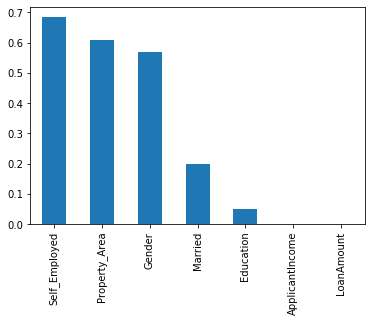

In [402]:
from sklearn.feature_selection import chi2
chi_scores  = chi2(x_train, y_train)
print(chi_scores)
p_values = pd.Series(chi_scores[1], index = x_train.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()